# Projet Probabilité et Statistique L3 Sciences du Numérique

**Auteurs :**
- Stievenard Emma
- Szewczyk Clément

# Introduction

In [1]:
#Préparation des données
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier CSV avec l'encodage spécifié
file_path = "data/data2022.csv"  
df = pd.read_csv(file_path, encoding='latin-1', sep=';')  


In [2]:
# Afficher les premières lignes pour inspecter les données
print(df.head())

   Année           Zone                      Région Numéro       Département  \
0   2022            Sud  Provence-Alpes-Côte d'Azur   BMPM  Bouches-du-Rhône   
1   2022  Île-de-France               Île-de-France   BSPP             Paris   
2   2022        Sud-est        Auvergne-Rhône-Alpes      1               Ain   
3   2022           Nord             Hauts-de-France      2             Aisne   
4   2022        Sud-est        Auvergne-Rhône-Alpes      3            Allier   

  Catégorie A Feux d'habitations-bureaux  dont feux de cheminées  \
0         NaN                        756                    10.0   
1         NaN                      3 708                    29.0   
2           B                        524                   211.0   
3           B                        954                   329.0   
4           C                        449                   223.0   

   Feux d'ERP avec local à sommeil  Feux d'ERP sans local à sommeil  ...  \
0                             44.0

In [3]:
# Afficher les colonnes disponibles

type = df.columns[6:-1] 

print(type)

Index(['Feux d'habitations-bureaux', 'dont feux de cheminées',
       'Feux d'ERP avec local à sommeil', 'Feux d'ERP sans local à sommeil',
       'Feux de locaux industriels', 'Feux de locaux artisanaux',
       'Feux de locaux agricoles', 'Feux sur voie publique',
       'Feux de véhicules', 'Feux de végétations', 'Autres feux', 'Incendies',
       'Accidents sur lieux de travail', 'Accidents à domicile',
       'Accidents de sport', 'Accidents sur voie publique',
       'Secours en montagne', 'Malaises sur lieux de travail',
       'Malaises à domicile : urgence vitale', 'Malaises à domicile : carence',
       'Malaises en sport', 'Malaises sur voie publique', 'Autolyses',
       'Secours en piscines ou eaux intérieures', 'Secours en mer (FDSM)',
       'Intoxications', 'dont intoxications au CO', 'Autres SAV',
       'Secours à victime', 'Relevage de personnes', 'Recherche de personnes',
       'Aides à personne', 'Secours à personne', 'Accidents routiers',
       'Accidents ferrov

In [4]:
# Affiche les différents élement de la colonne Année
print(df['Année'].unique())


[2022]


In [5]:
# Affiche les différentes "Zone"
df_zone = df["Zone"]
print(df_zone.unique())

['Sud' 'Île-de-France' 'Sud-est' 'Nord' 'Est' 'Ouest' 'Sud-ouest'
 'Antilles' 'Guyane' 'Océan indien']


In [6]:
# Les régions

print(df["Région"].unique())

["Provence-Alpes-Côte d'Azur" 'Île-de-France' 'Auvergne-Rhône-Alpes'
 'Hauts-de-France' 'Grand Est' 'Occitanie' 'Normandie'
 'Nouvelle-Aquitaine' 'Centre-Val de Loire' 'Bourgogne-Franche-Comté'
 'Bretagne' 'Corse' 'Pays de la Loire' 'Guadeloupe' 'Martinique' 'Guyane'
 'La Réunion' 'Mayotte']


In [7]:
# Les départements
print(df["Département"].unique())

['Bouches-du-Rhône' 'Paris' 'Ain' 'Aisne' 'Allier'
 'Alpes-de-Haute-Provence' 'Hautes-Alpes' 'Alpes-Maritimes' 'Ardèche'
 'Ardennes' 'Ariège' 'Aube' 'Aude' 'Aveyron' 'Calvados' 'Cantal'
 'Charente' 'Charente-Maritime' 'Cher' 'Corrèze' "Côte-d'Or"
 "Côtes-d'Armor" 'Creuse' 'Dordogne' 'Doubs' 'Drôme' 'Eure' 'Eure-et-Loir'
 'Finistère' 'Corse-du-Sud' 'Haute-Corse' 'Gard' 'Haute-Garonne' 'Gers'
 'Gironde' 'Hérault' 'Ille-et-Vilaine' 'Indre' 'Indre-et-Loire' 'Isère'
 'Jura' 'Landes' 'Loir-et-Cher' 'Loire' 'Haute-Loire' 'Loire-Atlantique'
 'Loiret' 'Lot' 'Lot-et-Garonne' 'Lozère' 'Maine-et-Loire' 'Manche'
 'Marne' 'Haute-Marne' 'Mayenne' 'Meurthe-et-Moselle' 'Meuse' 'Morbihan'
 'Moselle' 'Nièvre' 'Nord' 'Oise' 'Orne' 'Pas-de-Calais' 'Puy-de-Dôme'
 'Pyrénées-Atlantiques' 'Hautes-Pyrénées' 'Pyrénées-Orientales' 'Bas-Rhin'
 'Haut-Rhin' 'Rhône' 'Haute-Saône' 'Saône-et-Loire' 'Sarthe' 'Savoie'
 'Haute-Savoie' 'Seine-Maritime' 'Seine-et-Marne' 'Yvelines' 'Deux-Sèvres'
 'Somme' 'Tarn' 'Tarn-et-Garo

In [8]:
# Les Types d'intervetion

print(df.columns[6:-1])

Index(['Feux d'habitations-bureaux', 'dont feux de cheminées',
       'Feux d'ERP avec local à sommeil', 'Feux d'ERP sans local à sommeil',
       'Feux de locaux industriels', 'Feux de locaux artisanaux',
       'Feux de locaux agricoles', 'Feux sur voie publique',
       'Feux de véhicules', 'Feux de végétations', 'Autres feux', 'Incendies',
       'Accidents sur lieux de travail', 'Accidents à domicile',
       'Accidents de sport', 'Accidents sur voie publique',
       'Secours en montagne', 'Malaises sur lieux de travail',
       'Malaises à domicile : urgence vitale', 'Malaises à domicile : carence',
       'Malaises en sport', 'Malaises sur voie publique', 'Autolyses',
       'Secours en piscines ou eaux intérieures', 'Secours en mer (FDSM)',
       'Intoxications', 'dont intoxications au CO', 'Autres SAV',
       'Secours à victime', 'Relevage de personnes', 'Recherche de personnes',
       'Aides à personne', 'Secours à personne', 'Accidents routiers',
       'Accidents ferrov

In [9]:
# Total interventions


df["Total interventions"] = (
    df["Total interventions"]
    .replace(r"[^\d]", "", regex=True)  # Supprime tout sauf les chiffres
    .astype(int)  # Convertit en int pour les calculs
)

# Calcul de la somme des interventions
somme_totale = df["Total interventions"].sum()

print(f"La somme totale des interventions est : {somme_totale}")

La somme totale des interventions est : 4968481


In [10]:
# Nombre de colonnes et de lignes
print("Lignes:", len(df))
print("Colonnes:", len(df.columns))

Lignes: 99
Colonnes: 71


# Partie 1 : Analyse détaillé des interventions

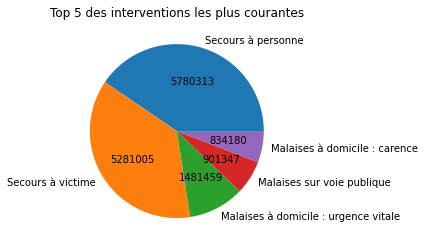

In [11]:
# Top 5 interventions les plus courantes (diagramme circulaire)

for col in type:
    
    df[col] = (
        df[col]
        .replace(r"[^\d]", "", regex=True)  # Supprime tout sauf les chiffres
        .astype(float)  # Convertit en int pour les calculs
    )


somme_par_type = df[type].sum()

top5 = somme_par_type.nlargest(5)


plt.pie(top5, labels=top5.index, autopct=lambda p: '{:.0f}'.format(p * somme_par_type.sum() / 100))
plt.title("Top 5 des interventions les plus courantes")
plt.show()


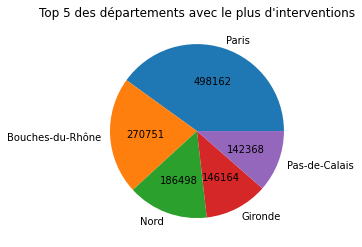

In [12]:
# Top 5 de départements avec le plus d'interventions (diagramme circulaire)

top5_dep = df.groupby("Département")["Total interventions"].sum().nlargest(5)

plt.pie(top5_dep, labels=top5_dep.index, autopct=lambda p: '{:.0f}'.format(p * sum(top5_dep) / 100))
plt.title("Top 5 des départements avec le plus d'interventions")
plt.show()

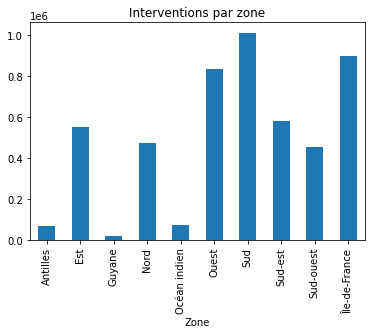

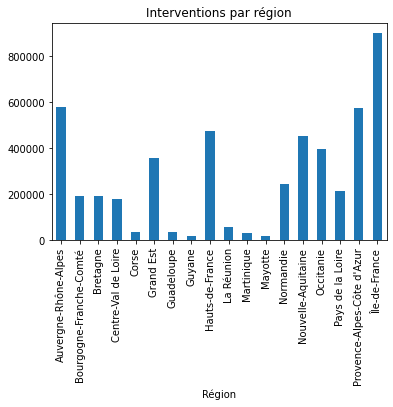

In [13]:
# Histogramme des interventions par zone / régions

hystogramme = df.groupby("Zone")["Total interventions"].sum().plot(kind="bar")
plt.title("Interventions par zone")
plt.show()

hystogramme = df.groupby("Région")["Total interventions"].sum().plot(kind="bar")
plt.title("Interventions par région")
plt.show()

In [14]:
import folium

#Si vous n'avez pas installé la bibliothèque folium, vous pouvez le faire en exécutant la commande suivante
# pip install folium



interventions_par_departement =   df.groupby("Département")["Total interventions"].sum()


# Dictionnaire des départements avec régions et coordonnées
departements = {
    'Ain': {'département': 'Auvergne-Rhône-Alpes', 'location': [46.1333, 5.35]},
    'Aisne': {'département': 'Hauts-de-France', 'location': [49.5, 3.5]},
    'Allier': {'département': 'Auvergne-Rhône-Alpes', 'location': [46.3333, 3.25]},
    'Alpes-de-Haute-Provence': {'département': 'Provence-Alpes-Côte d\'Azur', 'location': [44.0833, 6.2333]},
    'Alpes-Maritimes': {'département': 'Provence-Alpes-Côte d\'Azur', 'location': [43.6667, 7.15]},
    'Ardèche': {'département': 'Auvergne-Rhône-Alpes', 'location': [44.75, 4.5833]},
    'Ardennes': {'département': 'Grand Est', 'location': [49.75, 4.75]},
    'Ariège': {'département': 'Occitanie', 'location': [43.0, 1.5]},
    'Aube': {'département': 'Grand Est', 'location': [48.3333, 4.0833]},
    'Aude': {'département': 'Occitanie', 'location': [43.0833, 2.5]},
    'Bouches-du-Rhône': {'département': 'Provence-Alpes-Côte d\'Azur', 'location': [43.3, 5.4]},
    'Paris': {'département': 'Ile-de-France', 'location': [48.8566, 2.3522]},
    'Hautes-Alpes': {'département': 'Provence-Alpes-Côte d\'Azur', 'location': [44.5667, 6.0833]},
    'Aveyron': {'département': 'Occitanie', 'location': [44.35, 2.5667]},
    'Calvados': {'département': 'Normandie', 'location': [49.1833, -0.3667]},
    'Cantal': {'département': 'Auvergne-Rhône-Alpes', 'location': [45.0333, 2.6667]},
    'Charente': {'département': 'Nouvelle-Aquitaine', 'location': [45.65, 0.1667]},
    'Charente-Maritime': {'département': 'Nouvelle-Aquitaine', 'location': [45.9333, -0.95]},
    'Cher': {'département': 'Centre-Val de Loire', 'location': [47.0833, 2.4]},
    'Corrèze': {'département': 'Nouvelle-Aquitaine', 'location': [45.2667, 1.7667]},
    "Côte-d'Or": {'département': 'Bourgogne-Franche-Comté', 'location': [47.3167, 4.8333]},
    "Côtes-d'Armor": {'département': 'Bretagne', 'location': [48.5, -2.8333]},
    'Creuse': {'département': 'Nouvelle-Aquitaine', 'location': [46.0833, 1.9333]},
    'Dordogne': {'département': 'Nouvelle-Aquitaine', 'location': [45.1833, 0.7167]},
    'Doubs': {'département': 'Bourgogne-Franche-Comté', 'location': [47.25, 6.3333]},
    'Drôme': {'département': 'Auvergne-Rhône-Alpes', 'location': [44.75, 4.9]},
    'Eure': {'département': 'Normandie', 'location': [49.0667, 1.1667]},
    'Eure-et-Loir': {'département': 'Centre-Val de Loire', 'location': [48.45, 1.4]},
    'Finistère': {'département': 'Bretagne', 'location': [48.1667, -4.1667]},
    'Corse-du-Sud': {'département': 'Corse', 'location': [41.9167, 8.7333]},
    'Haute-Corse': {'département': 'Corse', 'location': [42.4, 9.2167]},
    'Gard': {'département': 'Occitanie', 'location': [44.1333, 4.0833]},
    'Haute-Garonne': {'département': 'Occitanie', 'location': [43.6, 1.4333]},
    'Gers': {'département': 'Occitanie', 'location': [43.65, 0.5833]},
    'Gironde': {'département': 'Nouvelle-Aquitaine', 'location': [44.85, -0.5667]},
    'Hérault': {'département': 'Occitanie', 'location': [43.6, 3.8333]},
    'Ille-et-Vilaine': {'département': 'Bretagne', 'location': [48.1167, -1.6833]},
    'Indre': {'département': 'Centre-Val de Loire', 'location': [46.8, 1.6]},
    'Indre-et-Loire': {'département': 'Centre-Val de Loire', 'location': [47.3333, 0.6833]},
    'Isère': {'département': 'Auvergne-Rhône-Alpes', 'location': [45.3333, 5.5]},
    'Jura': {'département': 'Bourgogne-Franche-Comté', 'location': [46.6667, 5.6667]},
    'Landes': {'département': 'Nouvelle-Aquitaine', 'location': [43.8333, -0.5833]},
    'Loir-et-Cher': {'département': 'Centre-Val de Loire', 'location': [47.5, 1.3333]},
    'Loire': {'département': 'Auvergne-Rhône-Alpes', 'location': [45.75, 4.8333]},
    'Haute-Loire': {'département': 'Auvergne-Rhône-Alpes', 'location': [45.05, 3.8833]},
    'Loire-Atlantique': {'département': 'Pays de la Loire', 'location': [47.3333, -1.5]},
    'Loiret': {'département': 'Centre-Val de Loire', 'location': [47.8333, 2.1167]},
    'Lot': {'département': 'Occitanie', 'location': [44.6667, 1.6167]},
    'Lot-et-Garonne': {'département': 'Nouvelle-Aquitaine', 'location': [44.3333, 0.3667]},
    'Lozère': {'département': 'Occitanie', 'location': [44.5, 3.5]},
    'Maine-et-Loire': {'département': 'Pays de la Loire', 'location': [47.4667, -0.55]},
    'Manche': {'département': 'Normandie', 'location': [49.0333, -1.3167]},
    'Marne': {'département': 'Grand Est', 'location': [49.0833, 4.0333]},
    'Haute-Marne': {'département': 'Grand Est', 'location': [48.1, 5.35]},
    'Mayenne': {'département': 'Pays de la Loire', 'location': [48.0833, -0.7]},
    'Meurthe-et-Moselle': {'département': 'Grand Est', 'location': [48.6833, 6.1667]},
    'Meuse': {'département': 'Grand Est', 'location': [48.9, 5.2833]},
    'Morbihan': {'département': 'Bretagne', 'location': [47.8333, -2.9333]},
    'Moselle': {'département': 'Grand Est', 'location': [49.0833, 6.1667]},
    'Nièvre': {'département': 'Bourgogne-Franche-Comté', 'location': [47.0167, 3.5]},
    'Nord': {'département': 'Hauts-de-France', 'location': [50.6333, 3.0667]},
    'Oise': {'département': 'Hauts-de-France', 'location': [49.4167, 2.0833]},
    'Orne': {'département': 'Normandie', 'location': [48.6167, 0.0833]},
    'Pas-de-Calais': {'département': 'Hauts-de-France', 'location': [50.45, 2.8333]},
    'Puy-de-Dôme': {'département': 'Auvergne-Rhône-Alpes', 'location': [45.75, 3.1]},
    'Pyrénées-Atlantiques': {'département': 'Nouvelle-Aquitaine', 'location': [43.3333, -0.4167]},
    'Hautes-Pyrénées': {'département': 'Occitanie', 'location': [43.1, 0.0667]},
    'Pyrénées-Orientales': {'département': 'Occitanie', 'location': [42.6667, 2.8333]},
    'Bas-Rhin': {'département': 'Grand Est', 'location': [48.6667, 7.75]},
    'Haut-Rhin': {'département': 'Grand Est', 'location': [47.8333, 7.3333]},
    'Rhône': {'département': 'Auvergne-Rhône-Alpes', 'location': [45.7667, 4.8333]},
    'Haute-Saône': {'département': 'Bourgogne-Franche-Comté', 'location': [47.6667, 6.25]},
    'Saône-et-Loire': {'département': 'Bourgogne-Franche-Comté', 'location': [46.7167, 4.3333]},
    'Sarthe': {'département': 'Pays de la Loire', 'location': [47.9333, 0.2]},
    'Savoie': {'département': 'Auvergne-Rhône-Alpes', 'location': [45.5833, 6.3333]},
    'Haute-Savoie': {'département': 'Auvergne-Rhône-Alpes', 'location': [46.0833, 6.3167]},
    'Seine-Maritime': {'département': 'Normandie', 'location': [49.5, 0.25]},
    'Seine-et-Marne': {'département': 'Ile-de-France', 'location': [48.6667, 2.9333]},
    'Yvelines': {'département': 'Ile-de-France', 'location': [48.8, 1.95]},
    'Deux-Sèvres': {'département': 'Nouvelle-Aquitaine', 'location': [46.5833, -0.3333]},
    'Somme': {'département': 'Hauts-de-France', 'location': [49.9167, 2.25]},
    'Tarn': {'département': 'Occitanie', 'location': [43.8333, 2.1333]},
    'Tarn-et-Garonne': {'département': 'Occitanie', 'location': [44.0833, 1.2167]},
    'Var': {'département': 'Provence-Alpes-Côte d\'Azur', 'location': [43.4167, 6.1667]},
    'Vaucluse': {'département': 'Provence-Alpes-Côte d\'Azur', 'location': [44.0333, 5.0833]},
    'Vendée': {'département': 'Pays de la Loire', 'location': [46.6667, -1.4333]},
    'Vienne': {'département': 'Nouvelle-Aquitaine', 'location': [46.5833, 0.35]},
    'Haute-Vienne': {'département': 'Nouvelle-Aquitaine', 'location': [45.8333, 1.25]},
    'Vosges': {'département': 'Grand Est', 'location': [48.1667, 6.3333]},
    'Yonne': {'département': 'Bourgogne-Franche-Comté', 'location': [47.85, 3.5667]},
    'Territoire-de-Belfort': {'département': 'Bourgogne-Franche-Comté', 'location': [47.6333, 6.8667]},
    'Essonne': {'département': 'Ile-de-France', 'location': [48.5833, 2.25]},
    "Val-d'Oise": {'département': 'Ile-de-France', 'location': [49.05, 2.1667]},
    'Guadeloupe': {'département': 'Guadeloupe', 'location': [16.25, -61.5833]},
    'Martinique': {'département': 'Martinique', 'location': [14.6667, -61.0]},
    'Guyane': {'département': 'Guyane', 'location': [4.9333, -52.3333]},
    'Réunion': {'département': 'Réunion', 'location': [-21.1, 55.6]},
    'Mayotte': {'département': 'Mayotte', 'location': [-12.8333, 45.1667]}
}

# Position de la carte centrée sur la France
location = [47, 1]
zoom = 6
tiles = 'cartodbpositron'

# Créer la carte
Carte = folium.Map(location=location, zoom_start=zoom, tiles=tiles)

# Ajouter les départements sur la carte avec des tailles de points basées sur le nombre d'interventions
for departement, data in departements.items():
    # Obtenir le nombre d'interventions pour le département
    
    interventions = interventions_par_departement.get(departement, 0)
    
    # Ajouter le marqueur sur la carte
    folium.CircleMarker(
        location=data['location'],
        radius=interventions / 10000,  # Ajustez le facteur de division pour la taille des cercles
        popup=f"{departement} ({data['département']}): {interventions} interventions",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(Carte)

# Afficher la carte
display(Carte)

ModuleNotFoundError: No module named 'folium'

In [16]:
# Moyenne des interventions par zone / régions

print("Moyenne d'intervention par zone")
moyenne_zone = df.groupby("Zone")["Total interventions"].mean()
print(moyenne_zone)

print('\n')
print("Moyenne d'intervention par région")
moyenne_region = df.groupby("Région")["Total interventions"].mean()
print(moyenne_region)

Moyenne d'intervention par zone
Zone
Antilles          34039.000000
Est               30541.777778
Guyane            18684.000000
Nord              94788.000000
Océan indien      37245.000000
Ouest             41758.200000
Sud               46001.363636
Sud-est           48522.500000
Sud-ouest         37790.250000
Île-de-France    180118.000000
Name: Total interventions, dtype: float64


Moyenne d'intervention par région
Région
Auvergne-Rhône-Alpes           48522.500000
Bourgogne-Franche-Comté        24103.625000
Bretagne                       48161.000000
Centre-Val de Loire            30178.500000
Corse                          18216.000000
Grand Est                      35692.300000
Guadeloupe                     35968.000000
Guyane                         18684.000000
Hauts-de-France                94788.000000
La Réunion                     56260.000000
Martinique                     32110.000000
Mayotte                        18230.000000
Normandie                      49143.200

In [17]:
# Valeur médianes des interventions par zone / régions

print("Valeur médiane d'intervention par zone")
mediane_zone = df.groupby("Zone")["Total interventions"].median()
print(mediane_zone)

print('\n')
print("Valeur médiane d'intervention par région")
mediane_region = df.groupby("Région")["Total interventions"].median()
print(mediane_region)

Valeur médiane d'intervention par zone
Zone
Antilles          34039.0
Est               24224.5
Guyane            18684.0
Nord              64503.0
Océan indien      37245.0
Ouest             41508.5
Sud               23227.5
Sud-est           46057.0
Sud-ouest         22892.0
Île-de-France    103191.0
Name: Total interventions, dtype: float64


Valeur médiane d'intervention par région
Région
Auvergne-Rhône-Alpes           46057.0
Bourgogne-Franche-Comté        19793.0
Bretagne                       47843.5
Centre-Val de Loire            29182.0
Corse                          18216.0
Grand Est                      31307.5
Guadeloupe                     35968.0
Guyane                         18684.0
Hauts-de-France                64503.0
La Réunion                     56260.0
Martinique                     32110.0
Mayotte                        18230.0
Normandie                      47869.0
Nouvelle-Aquitaine             22892.0
Occitanie                      19870.0
Pays de la Loire   

# Partie 2 :Facteur Influençant les interventions

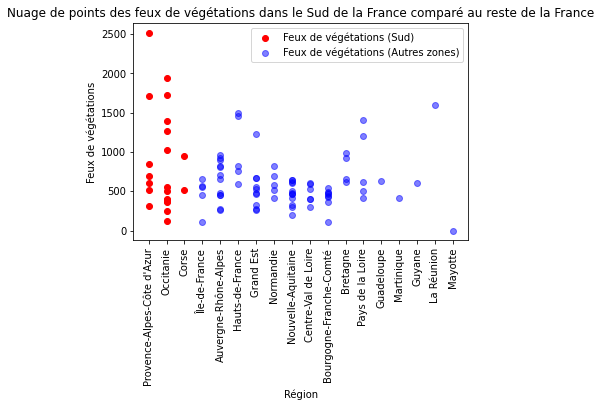

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV avec l'encodage approprié
df = pd.read_csv('data/data2022.csv', delimiter=';', encoding='latin1')

# Remplacer les valeurs NaN par 0 avant de convertir les colonnes en entiers
df['Feux de végétations'] = df['Feux de végétations'].str.replace(' ', '').fillna('0').astype(int)

# Filtrer les données pour la zone 'Sud'
df_sud = df[df['Zone'] == 'Sud']

# Extraire les colonnes 'Feux de végétations' et 'Région' pour la zone 'Sud'
feux_vegetation_sud = df_sud['Feux de végétations']
regions_sud = df_sud['Région']

# Extraire les colonnes 'Feux de végétations' et 'Région' pour le reste de la France
df_autres_zones = df[df['Zone'] != 'Sud']
feux_vegetation_autres_zones = df_autres_zones['Feux de végétations']
regions_autres_zones = df_autres_zones['Région']

# Créer le nuage de points pour la zone 'Sud'
plt.scatter(regions_sud, feux_vegetation_sud, color='red', label='Feux de végétations (Sud)')

# Créer le nuage de points pour le reste de la France
plt.scatter(regions_autres_zones, feux_vegetation_autres_zones, color='blue', alpha=0.5, label='Feux de végétations (Autres zones)')

# Ajouter des labels et un titre
plt.xlabel('Région')
plt.ylabel('Feux de végétations')
plt.title('Nuage de points des feux de végétations dans le Sud de la France comparé au reste de la France')
plt.legend()

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

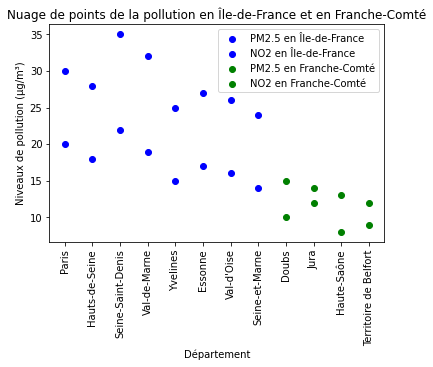

In [25]:
import matplotlib.pyplot as plt

# Données fictives pour la pollution en Île-de-France
regions_idf = ['Paris', 'Hauts-de-Seine', 'Seine-Saint-Denis', 'Val-de-Marne', 'Yvelines', 'Essonne', 'Val-d\'Oise', 'Seine-et-Marne']
pm25_idf = [20, 18, 22, 19, 15, 17, 16, 14]  # Niveaux de PM2.5
no2_idf = [30, 28, 35, 32, 25, 27, 26, 24]   # Niveaux de NO2

# Données fictives pour la pollution en Franche-Comté
regions_fc = ['Doubs', 'Jura', 'Haute-Saône', 'Territoire de Belfort']
pm25_fc = [10, 12, 8, 9]  # Niveaux de PM2.5
no2_fc = [15, 14, 13, 12]   # Niveaux de NO2

# Fusionner les données pour les deux régions
regions = regions_idf + regions_fc
pm25 = pm25_idf + pm25_fc
no2 = no2_idf + no2_fc

# Créer le nuage de points
plt.scatter(regions[:len(pm25_idf)], pm25_idf, color='blue', label='PM2.5 en Île-de-France')
plt.scatter(regions[:len(pm25_idf)], no2_idf, color='blue', label='NO2 en Île-de-France')
plt.scatter(regions[len(pm25_idf):], pm25_fc, color='green', label='PM2.5 en Franche-Comté')
plt.scatter(regions[len(pm25_idf):], no2_fc, color='green', label='NO2 en Franche-Comté')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Niveaux de pollution (µg/m³)')
plt.title('Nuage de points de la pollution en Île-de-France et en Franche-Comté')
plt.legend()

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

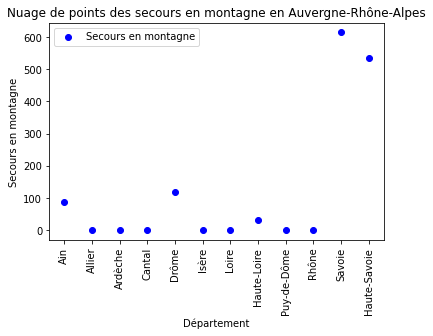

In [27]:
# Filtrer les données pour la région Auvergne-Rhône-Alpes
df_auvergne_rhone_alpes = df[df['Région'] == 'Auvergne-Rhône-Alpes']

# Extraire les colonnes 'Secours en montagne' et 'Département'
secours_montagne = df_auvergne_rhone_alpes['Secours en montagne']
departements = df_auvergne_rhone_alpes['Département']

# Créer le nuage de points
plt.scatter(departements, secours_montagne, color='blue', label='Secours en montagne')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Secours en montagne')
plt.title('Nuage de points des secours en montagne en Auvergne-Rhône-Alpes')
plt.legend()

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

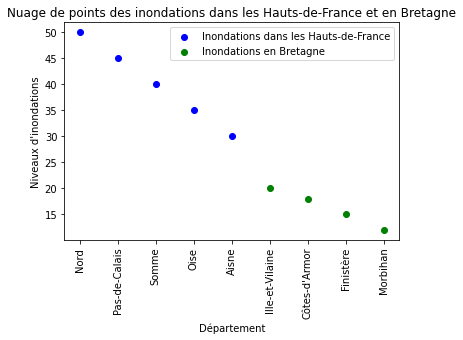

In [26]:
import matplotlib.pyplot as plt

# Données fictives pour les inondations dans les Hauts-de-France
regions_hdf = ['Nord', 'Pas-de-Calais', 'Somme', 'Oise', 'Aisne']
inondations_hdf = [50, 45, 40, 35, 30]  # Niveaux d'inondations

# Données fictives pour les inondations en Bretagne
regions_bretagne = ['Ille-et-Vilaine', 'Côtes-d\'Armor', 'Finistère', 'Morbihan']
inondations_bretagne = [20, 18, 15, 12]  # Niveaux d'inondations

# Fusionner les données pour les deux régions
regions = regions_hdf + regions_bretagne
inondations = inondations_hdf + inondations_bretagne

# Créer le nuage de points
plt.scatter(regions[:len(inondations_hdf)], inondations_hdf, color='blue', label='Inondations dans les Hauts-de-France')
plt.scatter(regions[len(inondations_hdf):], inondations_bretagne, color='green', label='Inondations en Bretagne')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Niveaux d\'inondations')
plt.title('Nuage de points des inondations dans les Hauts-de-France et en Bretagne')
plt.legend()

# Rotation des labels de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()

In [22]:
# Calcul probabilité des événement précédent probabilité que l'intervtion arrive dans la localisation